# Universidade Tecnológica Federal do Paraná
## Programa de Pós-Graduação em Computação Aplicada
### Ciência de Dados 2 - 2021/1
### Equipe Evolution:
### Leila Fabiola Ferreira
### Mateus Cichelero da Silva
  
## Atividade 2 - Análise exploratória: Arquivo Cord-19 - Extração de dados e EDA

   Esta atividade tem como objetivo fazer a coleta e leitura (parsing) do corpus fornecido pela plataforma do Cord-19, bem como realizar a etapa de análise exploratória dos dados. O arquivo utilizado está no formato .csv e traz informações sobre artigos publicados nos anos 2020 e 2021, com assuntos relacionados a covid-19, contando com um total de 140265 linhas e 7 colunas, nas quais foram extraídas as seguintes informações: ID, data de publicação, abstract, Nome da revista, Título do artigo, Autores, url do artigo. Este corpus pode ser atualizado/alterado, sendo possível incluir publicações de outros anos por exemplo. 

In [ ]:
import pandas as pd

Funções

In [ ]:
def print_str(df, col_name, n_lines):
    for i in range(0,n_lines+1):
        print("Line: {}".format(i))
        print(repr(df.loc[i, col_name]))
        print("\n")

def get_top_n_bigram(corpus, n=None):
    token = RegexpTokenizer(r'[a-zA-Z]+')
    vec = CountVectorizer(lowercase=False, 
                     stop_words=None,
                     ngram_range=(2,2), 
                     tokenizer=token.tokenize).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_words(corpus, n=None):
    token = RegexpTokenizer(r'[a-zA-Z]+')
    vec = CountVectorizer(lowercase=False, 
                     stop_words=None,
                     ngram_range=(0,1), 
                     tokenizer=token.tokenize).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


In [ ]:
#leitura do arquivo csv em um dataframe pandas
filepath = "/content/drive/MyDrive/Colab Notebooks/cord-19/dataset_cord19.csv"
df = pd.read_csv(filepath)


In [ ]:
display(df.head())

,cord_uid,title,abstract,publish_time,authors,journal,url
0,f9tg6xsg,Dexmedetomidine improved renal function in pat...,BACKGROUND: Dexmedetomidine has been reported ...,2020-01-02,"Nakashima, Tsuyoshi; Miyamoto, Kyohei; Shima, ...",J Intensive Care,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...
1,f73c639r,Aortic volume determines global end-diastolic ...,BACKGROUND: Global end-diastolic volume (GEDV)...,2020-01-02,"Akohov, Aleksej; Barner, Christoph; Grimmer, S...",Intensive Care Med Exp,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...
2,1qgpa45q,Whole genome sequencing and phylogenetic analy...,BACKGROUND: Human metapneumovirus (HMPV) is an...,2020-01-02,"Kamau, Everlyn; Oketch, John W.; de Laurent, Z...",BMC Genomics,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...
3,g34f5w6b,European intensive care physicians’ experience...,BACKGROUND: Antimicrobial resistance (AMR) com...,2020-01-02,"Lepape, Alain; Jean, Astrid; De Waele, Jan; Fr...",Antimicrob Resist Infect Control,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...
4,d1pd09zj,Synthetic carbohydrate-based vaccines: challen...,Glycoconjugate vaccines based on bacterial cap...,2020-01-03,"Mettu, Ravinder; Chen, Chiang-Yun; Wu, Chung-Yi",J Biomed Sci,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...


Gerando a wordcloud da coluna titulo

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

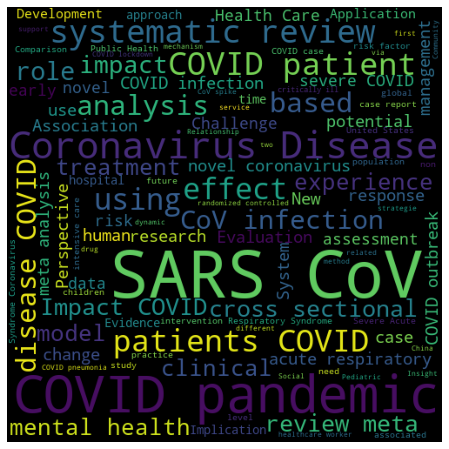

In [ ]:
text = ''.join(df['title'])
wordcloud = WordCloud(width=500,height=500,
                      margin=2,max_words=100, 
                      normalize_plurals=True,
                      stopwords=STOPWORDS,
                      background_color = 'black',).generate(str(text))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140265 entries, 0 to 140264
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   cord_uid      140265 non-null  object
 1   title         140265 non-null  object
 2   abstract      140265 non-null  object
 3   publish_time  140265 non-null  object
 4   authors       140265 non-null  object
 5   journal       140265 non-null  object
 6   url           140265 non-null  object
dtypes: object(7)
memory usage: 7.5+ MB


In [ ]:
print(df.columns)

Index(['cord_uid', 'title', 'abstract', 'publish_time', 'authors', 'journal',
       'url'],
      dtype='object')


Colocando os textos em letra minúscula

In [ ]:
df['title'] = [l.lower() for l in df['title']]
df['abstract']= [l.lower() for l in df['abstract']]
df['authors'] = [l.lower() for l in df['authors']]
df['journal'] = [l.lower() for l in df['journal']]

Aplicando Tokenização

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df['title'] = df['title'].apply(word_tokenize)
df['abstract'] = df['abstract'].apply(word_tokenize)
df['authors'] = df['authors'].apply(word_tokenize)
df['journal'] = df['journal'].apply(word_tokenize)

Removendo a pontuação

In [ ]:
import string

In [ ]:
punc = string.punctuation

In [ ]:
df['title'] = df['title'].apply(lambda x: [word for word in x if word not in punc])
df['abstract'] = df['abstract'].apply(lambda x: [word for word in x if word not in punc])
df['authors'] = df['authors'].apply(lambda x: [word for word in x if word not in punc])
df['journal'] = df['journal'].apply(lambda x: [word for word in x if word not in punc])

Removendo StopWords

In [ ]:
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
df['title'] = df['title'].apply(lambda x: [word for word in x if word not in stop_words])
df['abstract'] = df['abstract'].apply(lambda x: [word for word in x if word not in stop_words])
df['authors'] = df['authors'].apply(lambda x: [word for word in x if word not in stop_words])
df['journal'] = df['journal'].apply(lambda x: [word for word in x if word not in stop_words])

In [ ]:
print_str(df, 'title', 1)

Line: 0
['dexmedetomidine', 'improved', 'renal', 'function', 'patients', 'severe', 'sepsis', 'exploratory', 'analysis', 'randomized', 'controlled', 'trial']


Line: 1
['aortic', 'volume', 'determines', 'global', 'end-diastolic', 'volume', 'measured', 'transpulmonary', 'thermodilution']




Aplicando POS_TAGGING na coluna 'abstract' antes da Lematização

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
df['pos_tag_abastract'] = df['abstract'].apply(nltk.tag.pos_tag)

In [ ]:
postag = df['pos_tag_abastract'].apply(lambda x: [tupl[1] for tupl in x])
display(postag[0:1])

0    [NN, NN, VBN, JJ, NN, NN, RB, JJ, NNS, JJ, VBD...
Name: pos_tag_abastract, dtype: object

Verificando as 15 POS_TAGGING mais frequentes antes da Lematização

In [ ]:
import plotly.express as px
from collections import Counter

In [ ]:
tags = [item for sublist in list(postag) for item in sublist]
count_tag = Counter(tags)
common = count_tag.most_common()
pos_t = pd.DataFrame(common[0:15], columns=['pos_tag_abastract','frequency'])

In [ ]:
px.bar(pos_t,x='pos_tag_abastract',y='frequency',title="POS_TAG Frequency", width=600,color='pos_tag_abastract' )

Aplicando Lematização nas colunas 'title' e 'abstract'

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
wnl = WordNetLemmatizer()

In [ ]:
df['abstract'] = df['abstract'].apply(lambda x: [wnl.lemmatize(word) for word in x if len(word)>0])
df['title'] = df['title'].apply(lambda x: [wnl.lemmatize(word) for word in x if len(word)>0])

In [ ]:
df['pos_tag_abs_lematized'] = df['abstract'].apply(nltk.tag.pos_tag)

Verificando as 15 POS_TAGGING mais frequentes após a lematização

In [ ]:
tagsl = df['pos_tag_abs_lematized'].apply(lambda x: [tupl[1] for tupl in x])
tagsl = [item for sublist in list(tagsl) for item in sublist]
count_tag = Counter(tagsl)
common = count_tag.most_common()

In [ ]:
pos_tl = pd.DataFrame(common[0:15], columns=['pos_tag_abs_lematized','frequency'])

In [ ]:
px.bar(pos_tl,x='pos_tag_abs_lematized',y='frequency',title="POS_TAG Frequency", width=600,color='pos_tag_abs_lematized' )

Contagem dos bigramas e unigramas mais comuns na coluna abstract

In [ ]:
from nltk.tokenize import word_tokenize, RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
dfb = (df['abstract'].astype(str))
common_words = get_top_n_bigram(dfb, 15)
dfb = pd.DataFrame(common_words, columns = ['BIGRAMS' , 'COUNT'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [ ]:
px.bar(dfb,x='BIGRAMS',y='COUNT',
       color='COUNT', title="Top 15 bigrams in article titles after pre-processing", 
       height=400, width=1000, 
       color_continuous_scale='Bluered_r')

In [ ]:
dfx = (df['abstract'].astype(str))
common_words = get_top_n_words(dfx, 15)
for word, freq in common_words:
  df_wc = pd.DataFrame(common_words, columns = ['WORD' , 'COUNT'])


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



In [ ]:
px.bar(df_wc,x='WORD',y='COUNT',color='COUNT', title="Top 15 words in abstract articles after pre-processing", height=400, width=1000, color_continuous_scale='Bluered_r')

Contagem de palavras da coluna 'abstract'

In [ ]:
df['n abstract words'] = df['abstract'].apply(lambda x: len(str(x).split()))

Gerando novo arquivo .csv com as modificações de pré-processamento

In [ ]:
df.to_csv('dataset_cord19_eda.csv', mode='a', header=True, index=False)